# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [3]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Using TensorFlow backend.


In [4]:
X_train.shape, Y_train.shape 

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape, Y_test.shape 

((10000, 32, 32, 3), (10000, 1))

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [6]:
x_train = X_train/255
x_test = X_test/255

In [7]:
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [8]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
tf.keras.backend.clear_session()

In [9]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [10]:
#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))

#Add Dropout
model.add(Dropout(0.25))

#Output layer
model.add(Dense(10, activation='softmax'))

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('r8internal.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1,
                                                    workers=4)

In [14]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 107s 2ms/sample - loss: 1.5143 - accuracy: 0.4526 - val_loss: 1.1907 - val_accuracy: 0.5853
Epoch 2/10
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.1310 - accuracy: 0.6010 - val_loss: 1.0083 - val_accuracy: 0.6466
Epoch 3/10
50000/50000 [==============================] - 105s 2ms/sample - loss: 0.9876 - accuracy: 0.6529 - val_loss: 0.9757 - val_accuracy: 0.6617
Epoch 4/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.8858 - accuracy: 0.6865 - val_loss: 0.9524 - val_accuracy: 0.6744
Epoch 5/10
50000/50000 [==============================] - 110s 2ms/sample - loss: 0.8008 - accuracy: 0.7152 - val_loss: 0.9415 - val_accuracy: 0.6784
Epoch 6/10
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.7249 - accuracy: 0.7417 - val_loss: 0.9468 - val_accuracy: 0.6823
Epoch 7/10
50000/50000 [==========================

In [15]:
y_pred = model.predict(x_test)

In [18]:
# Score trained model.
#scores = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', scores[0])
#print('Test accuracy:', scores[1])

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [19]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3))

553467904/553467096 [==============================] - 763s 1us/step


Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [22]:
import os

In [23]:
os.chdir("D:\Machine Learning\Lab_Assignments\R8_lab\images")

In [24]:
#Load an image using Keras image class
image_file = '4994221690_d070e8a355_c.jpg'
obj_image = tf.keras.preprocessing.image.load_img(image_file)

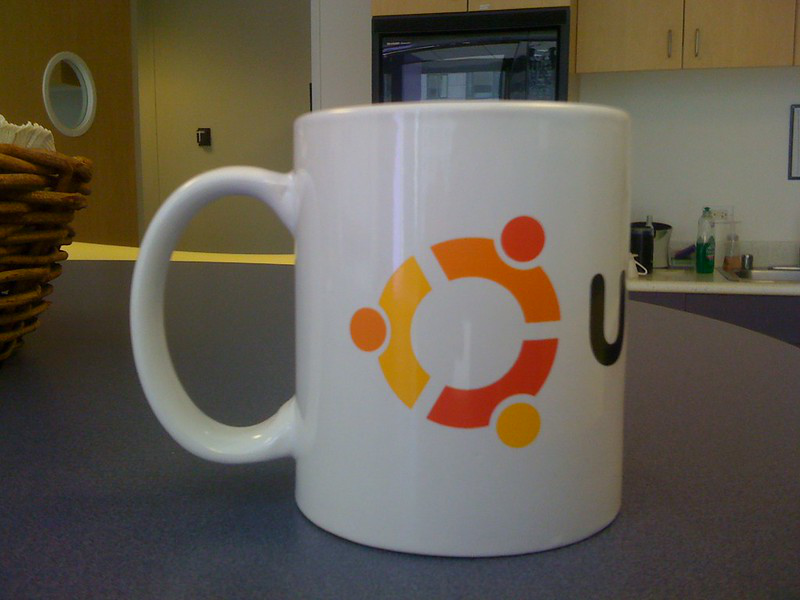

In [26]:
img_array = tf.keras.preprocessing.image.img_to_array(obj_image)
#Inspect image
obj_image

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [27]:
img_array.shape

(600, 800, 3)

In [31]:
import numpy as np
model_input = obj_image.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [33]:
prediction = vgg.predict(model_input)
prediction.shape

#Prediction Class
np.argmax(prediction[0])
tf.keras.applications.vgg16.decode_predictions(prediction)

[[('n03063599', 'coffee_mug', 0.7589646),
  ('n07930864', 'cup', 0.076536484),
  ('n03063689', 'coffeepot', 0.07420067),
  ('n04398044', 'teapot', 0.029663134),
  ('n03950228', 'pitcher', 0.023501348)]]

#NLP

## Question 1

Read file 'tweets.csv'

In [43]:
os.getcwd()

'D:\\Machine Learning\\Lab_Assignments\\R8_lab\\images'

In [44]:
os.chdir("D:\Machine Learning\Lab_Assignments\R8_lab")

In [46]:
import pandas as pd
df= pd.read_csv('tweets.csv',encoding ='latin')

**Drop null values**

*   Drop all the rows with null values




In [47]:
df.shape

(9093, 3)

In [48]:
new_df = df.dropna(axis = 0, how ='any') 

In [49]:
new_df.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [50]:
new_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

In [62]:
new_df.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion


**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [52]:
#new_df['tweet_text'] = new_df['tweet_text'].applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))
#new_df['tweet_text'] = new_df['tweet_text'].applymap(lambda s: s.lower())

import re 

new_df = new_df.applymap(lambda s: s.lower())

new_df= new_df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))

new_df= new_df.applymap(lambda s: s.strip())

## Question 3

In [95]:
new_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion                      2670
negative emotion                       519
no emotion toward brand or product      91
i cant tell                              9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [96]:
new_df1=new_df.loc[new_df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['negative emotion', 'positive emotion'])]

In [97]:
new_df1['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2670
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [98]:
# Create new column using dictionary 
new_data = { "positive emotion":1, 
             "negative emotion":0, 
              } 
# combine this new data with existing DataFrame 
new_df1["is_there_an_emotion_directed_at_a_brand_or_product"] = new_df1["is_there_an_emotion_directed_at_a_brand_or_product"].map(new_data) 

In [99]:
new_df1.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,0
7,#sxsw is just starting #ctia is around the cor...,android,1
8,beautifully smart and simple idea rt madebyman...,ipad or iphone app,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [100]:
X=new_df1.tweet_text
Y=new_df1.is_there_an_emotion_directed_at_a_brand_or_product

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [101]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [102]:
# split the new DataFrame into training and testing sets [Default test size = 25%]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [103]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(ngram_range=(1, 2), min_df=2 , stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [104]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(2391, 5269)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [105]:
log = LogisticRegression()


### Fit the classifer
- fit logistic regression classifier

In [106]:
log.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [107]:
nb = MultinomialNB()


### Fit the classifer
- fit naive bayes classifier

In [108]:
nb.fit(X_train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [109]:
y_pred_class_log = log.predict(X_test_dtm)


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [110]:
y_pred_class_nb = nb.predict(X_test_dtm)


## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [111]:
# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class_log))

0.8546365914786967


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [112]:
# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class_nb))

0.8421052631578947
